
# Exercici 1
> Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.
---


### Carguem el dataset amb el que treballerem


In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# load dataset
wines = pd.read_csv("wineData (1).txt", sep=",", header=None, names=["Tipus", "Alcohol", "Malic acid", 
"Ash","Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", 
"Hue", "OD280/OD315 of diluted wines", "Proline"])

# Show df
wines

,Tipus,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
# Rename columns to a shorter way
wines.columns = ["tip", "alcohol", "m_ac", "ash", "ash_alc", "magn", "t_phenols", "flav", "non_flav_phen", "proantho", "color", "hue", "prot_con", "proline"]
wines.head()

,tip,alcohol,m_ac,ash,ash_alc,magn,t_phenols,flav,non_flav_phen,proantho,color,hue,prot_con,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Descripció del dataset:

Veiem que es tracta d'un dataset de 14 variables i 178 registres.  
Dins d'aquestes variables veiem que 13 d'elles es basen en característiques dels vins i 1 en com es classifica.  
Serà interessant veure quants tipus de vi diferents hi ha.  
Totes les variables son númeriques, la majoria amb decimals (floats). Serà interessant veure com es correlacionen entre elles.  
La variable tipus no deixa de ser nominal, és a dir classifica en vins en categories però sense difèrencia de poder entre elles (llavors seria ordinal).  
Veiem que les unitats entre les diferents variables son diferents. Haurem de fer un escalat.

#### Expliquem les variables que tenim

1. **tip** -> Classe de vi (_target, int nominal_)
2. **alcohol** -> Canitat d'alcohol (_feature, float_)
3. **m_ac** -> Cantitat d'àcid Malic (_feature, float_)
4. **ash** -> Cantitat de cendre (_feature, float_)
5. **ash_alc** -> Cantitat d'alcalinitat que te la cendra (_feature, float_)
6. **magn** -> Cantitat de magnesi (_feature, int_)
7. **t_phenols** -> Cantitat total de fenol (_feature, float_)
8. **flav** -> Cantitat de flavonoides (_feature, float_)
9. **non_flav_phen** -> Cantitat de fenols no flavonoides (_feature, float_)
10. **proantho** -> Cantitat de proantocianines (_feature, float_)
11. **color** -> Intensitat del color (_feature, float_)
12. **hue** -> tonalitat (_feature, float_)
13. **prot_con** -> Concentració de proteina (_feature, float_)
14. **Proline** -> Cantitat de prolina que porta (_feature, int_)

Com que el que volem aprendre és a classificar el tipus de vi segons les seves propietats més endevant dividrem el dataset amb features (propietats del ví) i target (el nostre objectiu que és classificar-lo).

Comrpovem que els dtypes son correctes també. 

<AxesSubplot:xlabel='tip'>

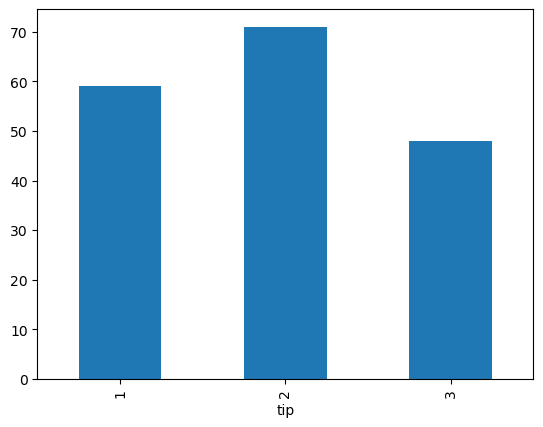

In [3]:
# Check diferents types of wine
wines.groupby('tip')['alcohol'].count().plot(kind='bar')

Tenim 3 tipus de vi diferent en els quals s'haurà de classificar la nova data que no tenim disponible. (Aquest seria el nostre objectiu).
Podem veure que tenim més mostres del tipus 2, que el tipus 1 i que el tipus 3. Lo ideal seria fer un balanceig per poder crear un model basat en els mateixos registres per cada un dels tipus. 

### Exploració del dataset

1. Comprovar que les dades del dataset son correctes. Ni Nulls, ni Nans ni duplicats i els dtypes són correctes. 
2. Resum estadístic del dataset.
3. Veure la correlació.
4. Comprovar la distribució de les dades i veure si hi ha outliers.

In [4]:
# Check df info
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tip            178 non-null    int64  
 1   alcohol        178 non-null    float64
 2   m_ac           178 non-null    float64
 3   ash            178 non-null    float64
 4   ash_alc        178 non-null    float64
 5   magn           178 non-null    int64  
 6   t_phenols      178 non-null    float64
 7   flav           178 non-null    float64
 8   non_flav_phen  178 non-null    float64
 9   proantho       178 non-null    float64
 10  color          178 non-null    float64
 11  hue            178 non-null    float64
 12  prot_con       178 non-null    float64
 13  proline        178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
# Check Nans
wines.isna().sum()

tip              0
alcohol          0
m_ac             0
ash              0
ash_alc          0
magn             0
t_phenols        0
flav             0
non_flav_phen    0
proantho         0
color            0
hue              0
prot_con         0
proline          0
dtype: int64

In [6]:
# Check duplicated values
wines.duplicated().sum()

0

_1. No hi ha ni nulls ni nans ni valors duplicats, quina sort! :)_

In [7]:
# statics+al summary
wines.describe().T

,count,mean,std,min,25%,50%,75%,max
tip,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
m_ac,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
ash_alc,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magn,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
t_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flav,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
non_flav_phen,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proantho,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


**_2. Resum estadístic del dataset_**  

Hem trasposat el data set perquè em sembla més fàcil de comparar.  
Com hem dit abans, al tenir unes unitats diferents les variables, haurem d'escalar perquè els resultats dels models funcioni millor. 
També veiem que pràcticament en la majoria de les variables no hi ha molta diferencia entre la mitja i la mitjana (quartil 50%), exceptuant _proline_. Els quartils també en un 60% de les variables aprox diria que segueixen una distribució proporcional, on veiem més diferència és en l'ultim. i la desviació estandard de les majoria d'elles és baixa execptuant les dos variables amb números enters _magn_ i _proline_. Això ens fa pensar que trobarem algun outilier però no molts en les variables. 


Text(0.5, 1.0, 'Correlation Heatmap')

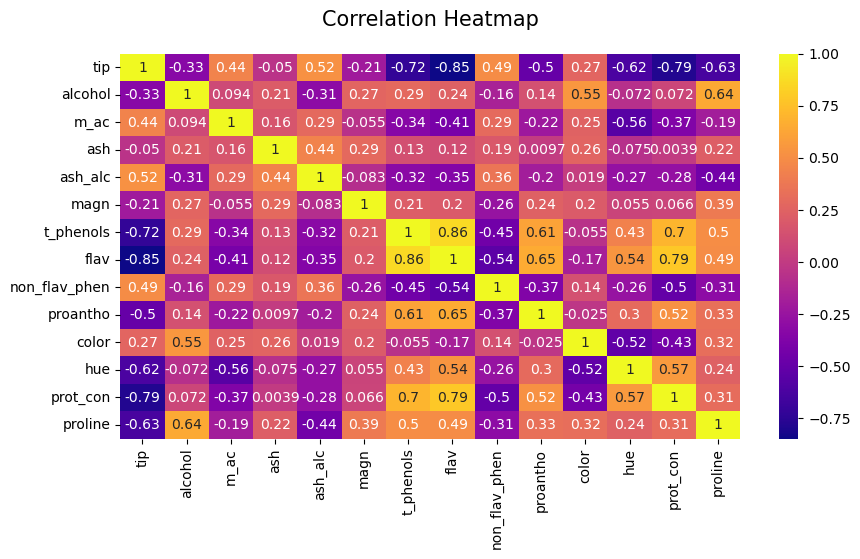

In [8]:
# Correlation heatmap plot
# plot size
plt.figure(figsize=(10,5))
sns.heatmap(wines.corr(), annot=True, cmap="plasma")
plt.title('Correlation Heatmap', fontsize=15, pad=20)

**_3. Correlació entre variables_**

Per una banda em sembla interessant veure primer com es relacionen les variables amb la nostra variable objectiu _tip_ i després destacar la relació entre les diferents variables features. 

Podem destacar que amb la variable _tip_ és on veiem una correlació més evidentment, sobretot negativa. Per sobre de tot destacaria que les que més es relacionen son _flav, t_phenols i _prot_con_.

Per altra banda, veiem una relació positiva bastant forta entre _flav i t_phenols_ que tenint en compte que son dos variables influents en el nostre target és normal que es relacionin també entre elles. També passa amb _prot_con_ l'alter variable relacionada amb el target. 

Per altra banda observem que les variables _ash i magn_ tenen una relació molt pobre amb la gran majoria de les variables.

In [9]:
# Create a function to see with a hipotesis  -> in this case if its Gaussian shape. 
# Import model from scipy
from scipy import stats
from scipy.stats import shapiro

# Show the Null hipotesis and the Alternative hipotesis
print("Nul Hipotesis (H0): The sample has a normal distribution (Probably Gaussian).")
print("Alternative Hipotesis (H1): The sample has NOT have a normal distribution (Probably NOT Gaussian).\n")

# Check if it is true the nul hipotesis
for i in wines.columns:
    shapiro_test = stats.shapiro(wines[i])
    if shapiro_test.pvalue > 0.05:
        print( i, "\nNul hipotesis is accepted, The sample has a normal distribution \033[1m(Probably Gaussian)\033[0m.\n")
    else:
        print(i, "\nNul hipotesis is rejected, The sample has NOT a normal distribution \033[1m(Probably NOT Gaussian)\033[0m.\n")

Nul Hipotesis (H0): The sample has a normal distribution (Probably Gaussian).
Alternative Hipotesis (H1): The sample has NOT have a normal distribution (Probably NOT Gaussian).

tip 
Nul hipotesis is rejected, The sample has NOT a normal distribution (Probably NOT Gaussian).

alcohol 
Nul hipotesis is rejected, The sample has NOT a normal distribution (Probably NOT Gaussian).

m_ac 
Nul hipotesis is rejected, The sample has NOT a normal distribution (Probably NOT Gaussian).

ash 
Nul hipotesis is rejected, The sample has NOT a normal distribution (Probably NOT Gaussian).

ash_alc 
Nul hipotesis is accepted, The sample has a normal distribution (Probably Gaussian).

magn 
Nul hipotesis is rejected, The sample has NOT a normal distribution (Probably NOT Gaussian).

t_phenols 
Nul hipotesis is rejected, The sample has NOT a normal distribution (Probably NOT Gaussian).

flav 
Nul hipotesis is rejected, The sample has NOT a normal distribution (Probably NOT Gaussian).

non_flav_phen 
Nul hi

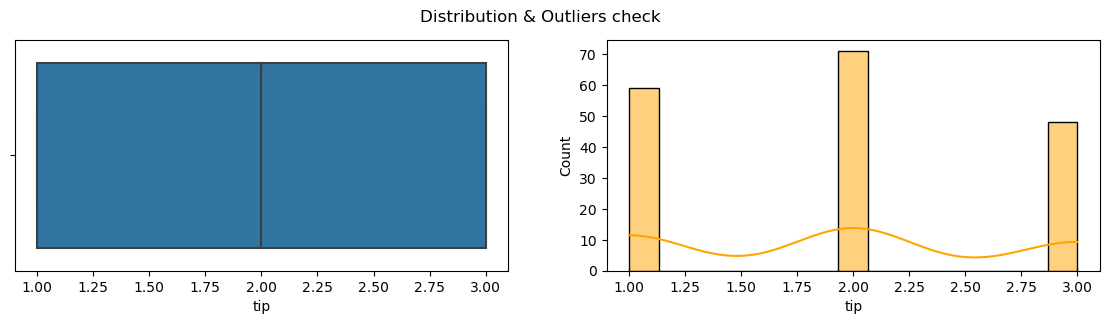

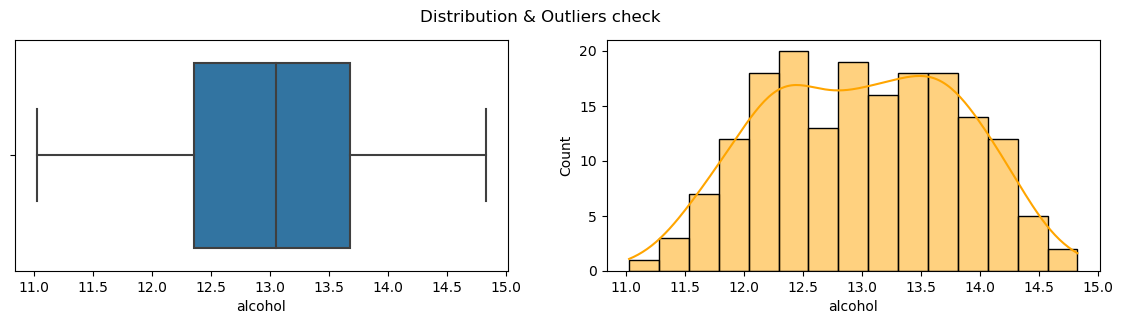

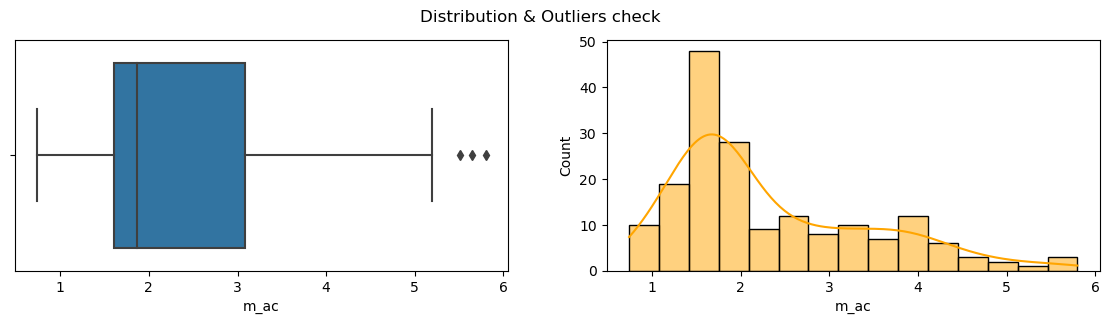

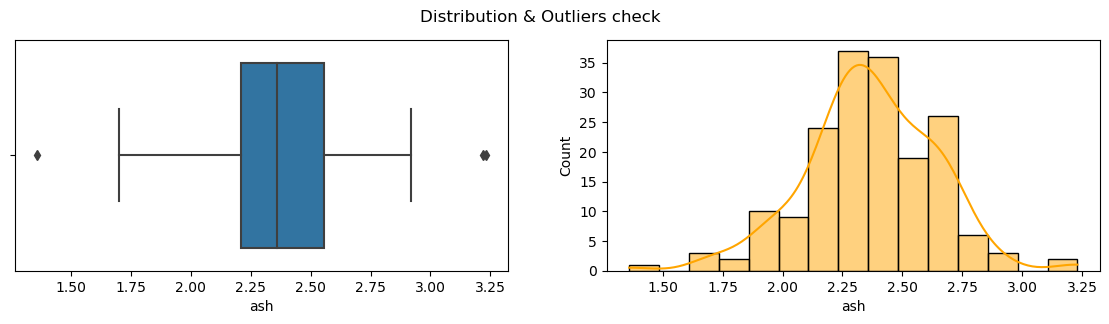

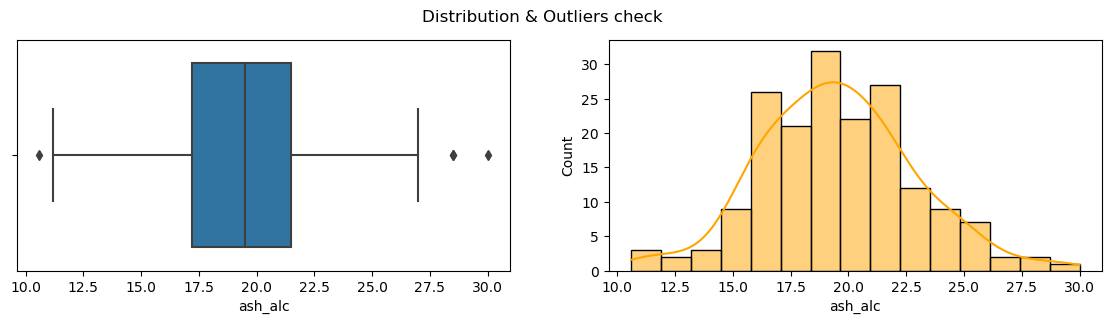

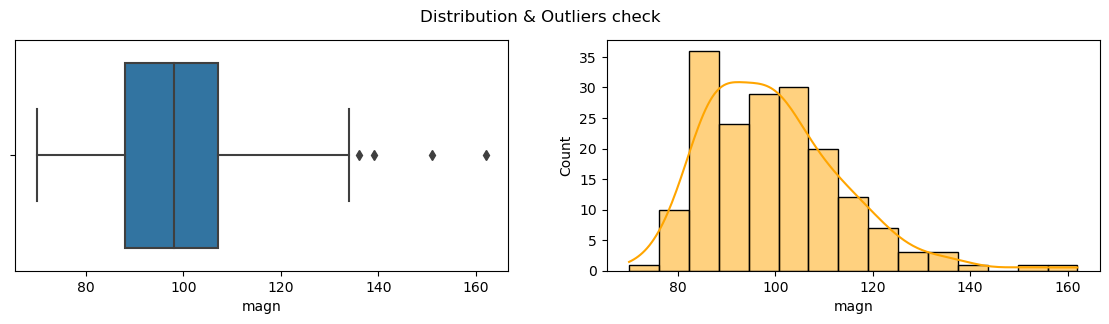

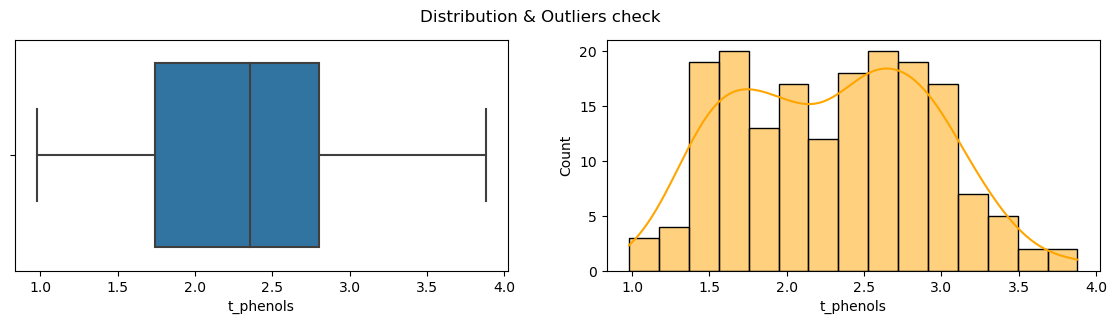

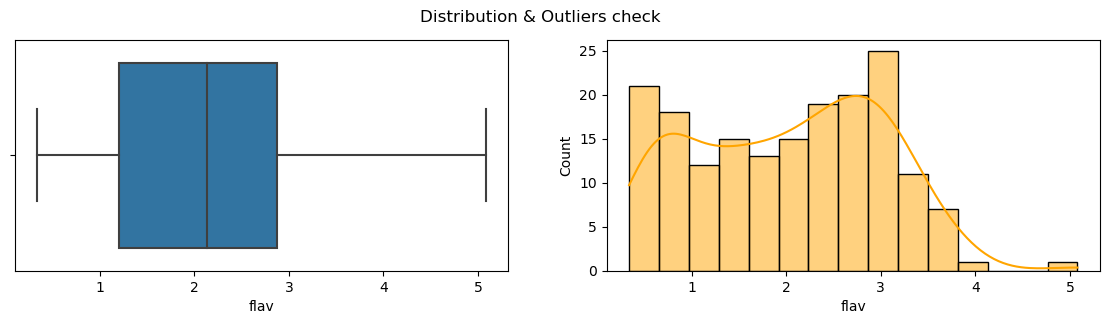

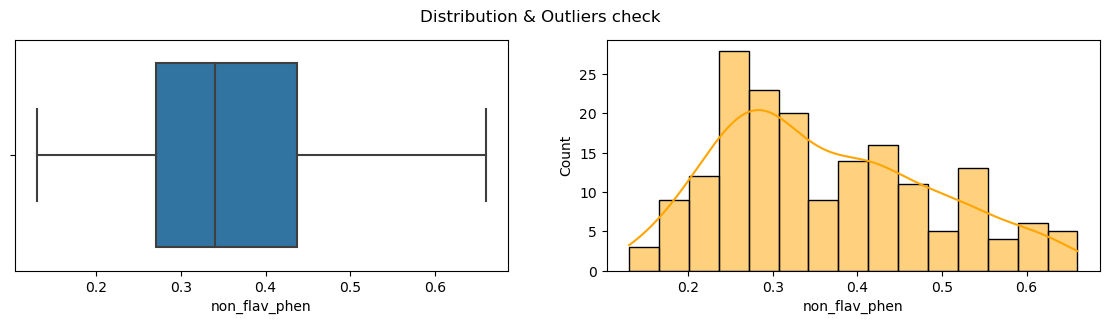

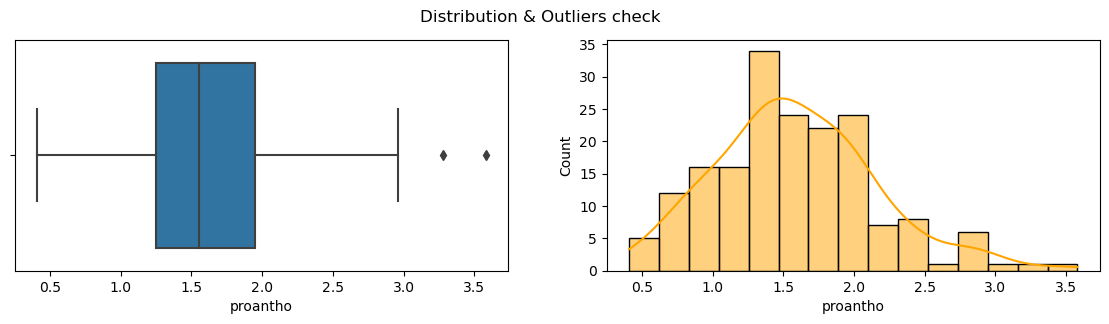

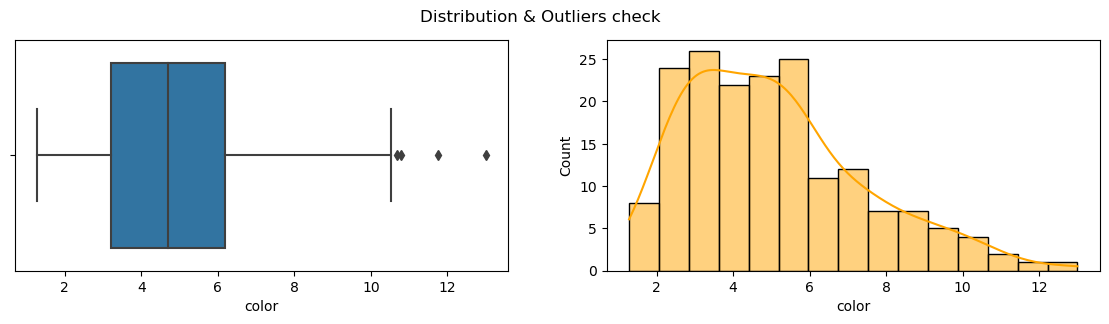

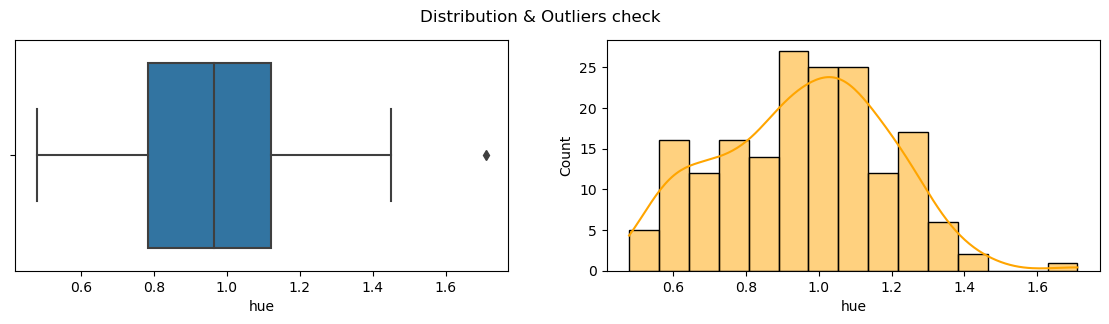

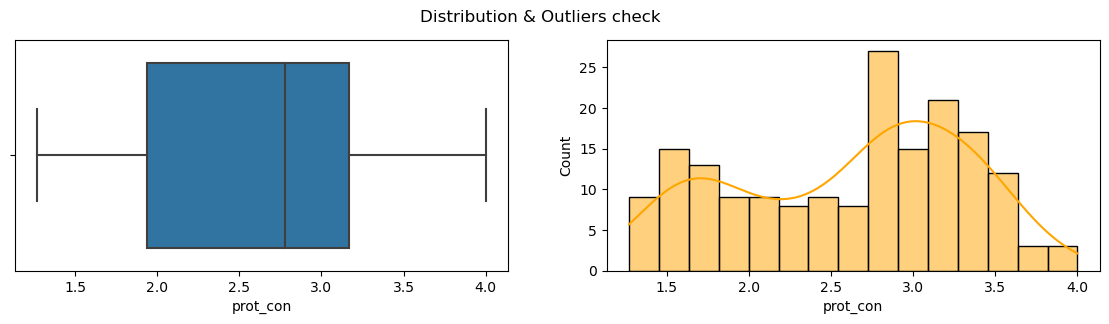

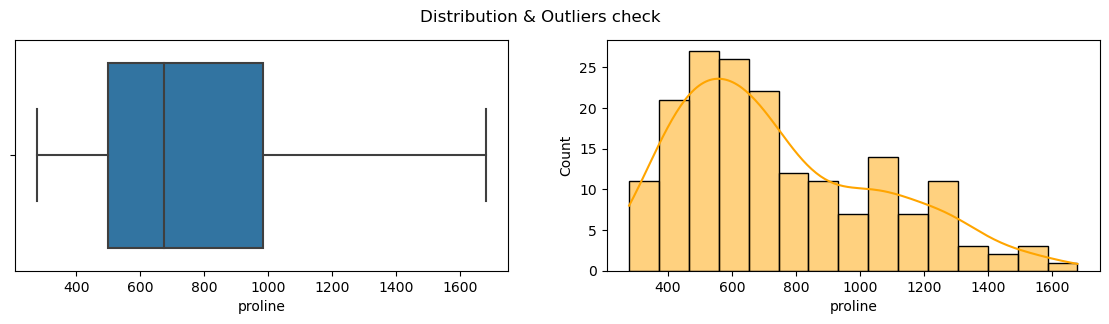

In [10]:
# Plot the distrbution of variables in histograma and boxplot and say it which distrbution has
# Create a iterative function for all the variables
for column in wines:
    fig, axes = plt.subplots(1,2, figsize = (14,3))
    fig.suptitle('Distribution & Outliers check')
    sns.histplot(ax=axes[1], data=wines, x=wines[column], bins=15, color='orange', kde= True)
    sns.boxplot(ax=axes[0], x =wines[column])

plt.show()

**4. Comprovació de la distribució i veure si hi ha outliers**

Tenint en compte que la distribució de _tip_ és categorica nominal, era obvi que no surtiria Gaussiana. A més al ser el nostre target no li farem preprocessat ja que és el valor nou que volem calcular. 

De la resta de variables veiem que només _ash_alc_ ens diu el test d'hipotesi que problament te una distribució normal. Amb els gràfics ho podem comprobar que si ho sembla que te forma de campana. 

De la resta de variables que ens surt No Guassianes les gràfiques confirmen aquesta hipotesi i en principi no crec que utilitzar PowerTransformer ho faci canviar. 

Pel que fa els outliers, amb l'ajuda dels gràfics boxplots veiem que els features _hue, color, proantho, magn, ash_alc, ash i m_ac_ **SI tenen OUTLIERS**.

Em sorprèn que surtin tantes variables amb outliers, perquè en un primer momentm veient el resum estadístic no m'ho esperava d'algunes variables i en canvi si m'esperava veuren en _proline_ i el gràfic ens mostra que no en té. 

### Preprocessat

Vist el tipus de variables que tenim farem el següent preprocessat per cada variable:

1. Variables númeriques amb **distribució Gaussiana**: _ash_alc_ -> **StandarScaler**  
  
2. Variables númeriques **sense distribució Gaussiana**:  
    * Amb **Outliers**: _hue, color, proantho, magn, ash i m_ac_ -> **RobustScaler**  
    * **NO Outliers**: _alcohol, t_phenols, flav, non_flav_phen, prot_con, proline_ -> **ScalerNorm**

In [11]:
# Import libraries and models for preprocessing
from sklearn import preprocessing


# Preprocessing with StandarScaler
ss = preprocessing.StandardScaler().fit(wines[["ash_alc"]])
wines["ash_alc"] = ss.transform(wines[["ash_alc"]])

# Preproncessing with RobustScaler 
rb = preprocessing.RobustScaler().fit(wines[["hue", "color", "proantho", "magn", "ash", "m_ac"]])
wines[["hue", "color", "proantho", "magn", "ash", "m_ac"]] = rb.transform(wines[["hue", "color", "proantho", "magn", "ash", "m_ac"]])

# Preprocessing with ScalerNorm
sn = preprocessing.MinMaxScaler().fit(wines[["alcohol", "t_phenols", "flav", "non_flav_phen", "prot_con", "proline"]])
wines[["alcohol", "t_phenols", "flav", "non_flav_phen", "prot_con", "proline"]] = sn.transform(wines[["alcohol", "t_phenols", "flav", "non_flav_phen", "prot_con", "proline"]])

#We show now the first 10 rows of our df
wines.head(10)

,tip,alcohol,m_ac,ash,ash_alc,magn,t_phenols,flav,non_flav_phen,proantho,color,hue,prot_con,proline
0,1,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963
5,1,0.834211,-0.070946,0.258993,-1.289707,0.736842,0.789655,0.643460,0.396226,0.592857,0.691275,0.251852,0.578755,0.835949
6,1,0.884211,0.003378,0.258993,-1.469878,-0.105263,0.524138,0.459916,0.320755,0.607143,0.187919,0.162963,0.846154,0.721826
7,1,0.797368,0.192568,0.719424,-0.569023,1.210526,0.558621,0.457806,0.339623,-0.435714,0.120805,0.281481,0.846154,0.725392
8,1,1.000000,-0.152027,-0.546763,-1.650049,-0.052632,0.627586,0.556962,0.301887,0.607143,0.171141,0.340741,0.578755,0.547076
9,1,0.744737,-0.347973,-0.258993,-1.049479,0.000000,0.689655,0.592827,0.169811,0.421429,0.848993,0.133333,0.835165,0.547076


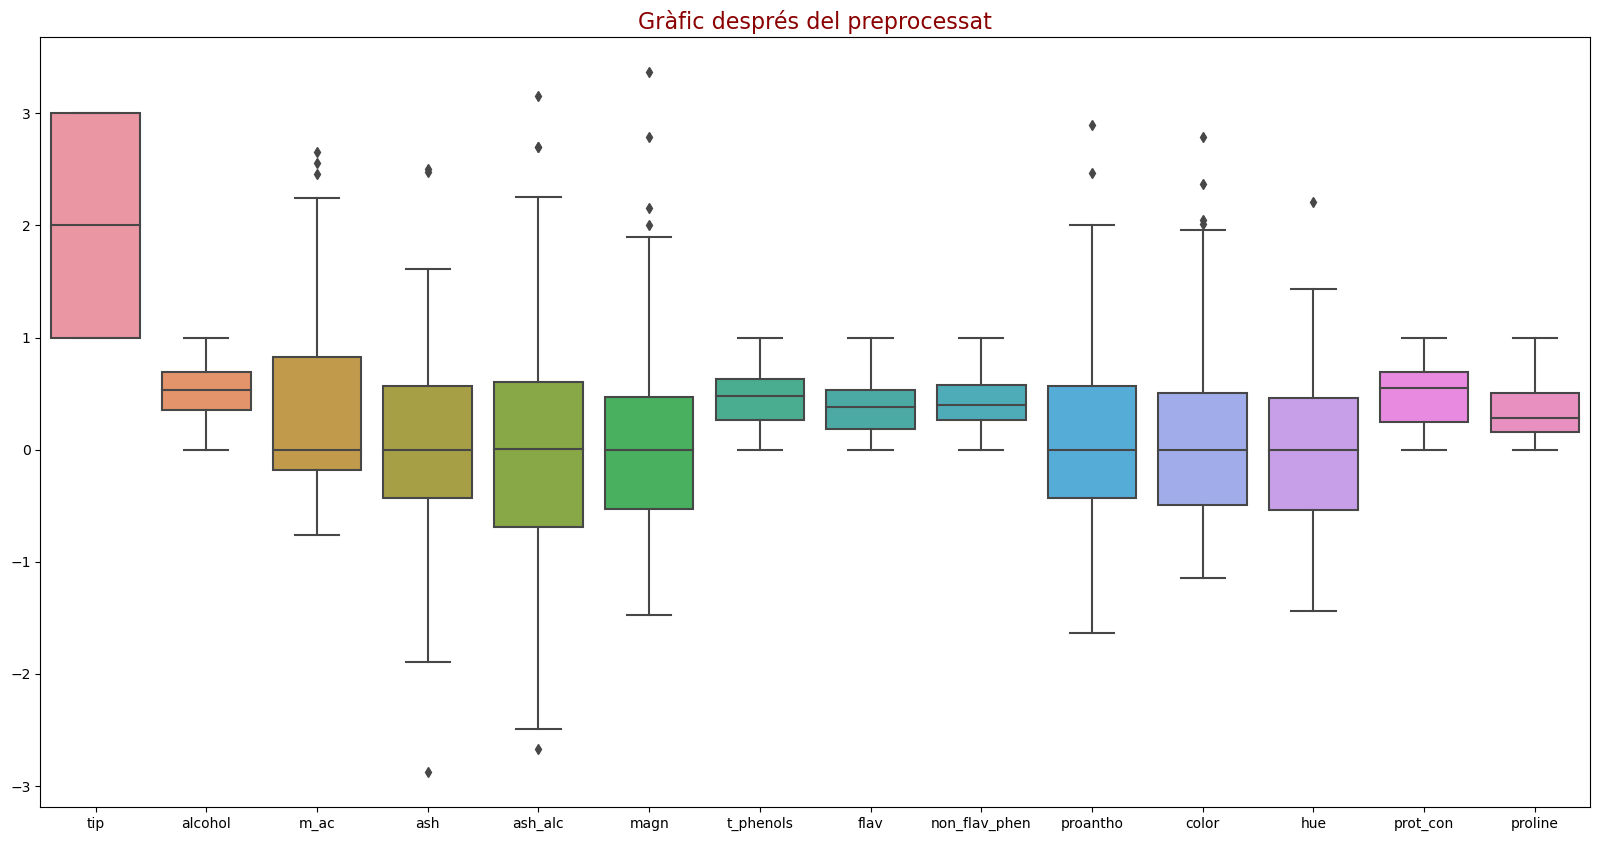

In [12]:
# plot our dataset after preprocessing data
fig, axs = plt.subplots(figsize=(20,10))
sns.boxplot(data=wines, ax=axs)
axs.set_title("Gràfic després del preprocessat", fontsize=16, color='Darkred')

plt.show()

_hem escalat correctament les variables features, la variable target tip no cal fer-ho. Estem preparats per crear els models, entrenar-los i poder fer les prediccions pertinents_

### Separació de la data en subsets (training i test)

Com que tenim poca data(només 178 registres) faig la separació en un 80% i 20% per incentivar el model d'entrenament. 

In [13]:
# We split our dataset in variables X (features) and y (target)
X = wines.drop(['tip'], axis = 1)
y = wines['tip']

# We import the library and model to split the data into Train and test df
from sklearn.model_selection import train_test_split

# We finally split the dataframe (75% data will be in training model, and the rest in test model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [14]:
# Taking a look to the shape of each of our subsets after spliting them
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


### Creem els models
   + Logistic Regression
   + K Nearest Neighbors
   + Support Vector Machines

In [15]:
# Import libraries and models
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Logistic Regression model and prediction
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred_logr = logr.predict(X_test) 

# Evaluating and prediction
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logr)
cnf_matrix

array([[12,  1,  0],
       [ 0, 11,  0],
       [ 0,  1, 11]], dtype=int64)

Text(0.5, -7.277777777777782, 'Predicted label')

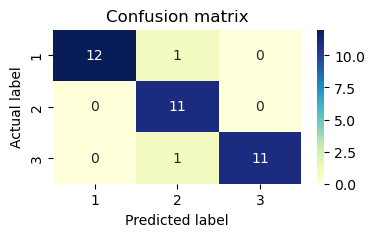

In [16]:
# create heatmap of confusion matrix
plt.figure(figsize=(4,2))
sns.heatmap(pd.DataFrame(cnf_matrix, columns= ["1", "2", "3"], index=["1", "2", "3"]), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logr))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       0.85      1.00      0.92        11
           3       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.94        36
weighted avg       0.95      0.94      0.95        36



**Conclusions model logistic regression**

<u>Matriu de confusio</u>

La matriu de confusió ja ens indica que el model treballa bastant bé. S'ha de tenir en compte que no tenim moltes mostres, el qual resta fiabilitat a qualsevol model però dins d'aquest, els resultats semblen molt bons. Hem de tenir en compte, que tampoc hem balancejat el model, cosa que també pot afectar a les prediccions.
Dit això, podem dir que el resultat és molt bo ja que només hi ha dos errors de classificació:
  * 1 mostra classificada com a 2 -> Hauria de ser 1
  * 1 mostra classificada com a 2 -> Hauria de ser 3.

<u>Informe de classificació</u>

Dins d'aquest informe podem veure diverses variables:
  + **precisió**: mostra el % en que el model classifica les mostres positives de manera correcta. Com hem comentat abans, en la matriu de confusió, s'ha equivocat 2 cop alhora de classificar el tipus 2, que els hauria d'haver de classificat com a 1 i 3. 
  + **recall**: mostra el % en que el model classifica totes les mostres positives de manera correcta. Observem que el valor més alt l'obté la classe dos, ja que dos valors que s'haurien d'haver classificat com a 1 i 3 s'han classificat com a 2. 
  + **f1_score**: és la mitja armònica entre precisió i recall, per això és una de les mètriques preferides per avaluar el rendiment dels models.
  + **support**: son la quantitat de mostres per cada grup de classificació i les totals. 
  + **accuracy**: és l'exactitud global del model, és a dir el total de mostres correctament classificades / mostres totals. En aquest cas seria 34/36.
  + **macro avg**: és la mitja aritmètica de les mètriques. No te en compte el pes de cada classe ni el número de mostres de cada una.
  + **weighted avg**: Aquest valor és similar al macro avg però amb la diferència que aqui si hi ha ponderació on el pes de cada classe és proporcional al número de mostres que te aquesta classe en el conjunt de les dades. Pot ser útil quan els grups estàn desequlibrats, però no és el nostre cas. 
  
En definitiva, ens fixarem sobretot en el gràfic de la matriu de confusió perquè ens indica com s'ha aplicat el model i podem veure on s'han donat els errors. Ens dona bastanta informació. Després ens fixarem amb la columna f1_score al ser la mitja entre accuracy i recall. i el valor que dona l'accuracy finalment. 

Idealment hauriem de tenir més mostres i haver balancejat el model (mateixes mostres de cada tipus) perquè guanyés fiabilitat el nostre model

In [18]:
# Import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix

# Knn model and prediction
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluation knn model 
print(f'mae: {mean_absolute_error(y_test, y_pred_knn)}')
print(f'mse: {mean_squared_error(y_test, y_pred_knn)}')
print(f'rmse: {mean_squared_error(y_test, y_pred_knn, squared=False)}')
print(f'r^2: {knn.score(X_test, y_test)}')

mae: 0.05555555555555555
mse: 0.05555555555555555
rmse: 0.23570226039551584
r^2: 0.9444444444444444


**Conclusions model knn**

  - **mae**: El valor baix de MAE ens indica que el model te una molt bona capacitat de generalització ja que, aquesta mètrica, ens indica la diferència absoluta entre les prediccions del model i els valors reals.
  - **mse**: És la mitja dels errors al quadrat de la predicció. D'aquesta manera penalitza més els errors més grans que els petits en la classificació. Així que com més baix millor resultat. Veiem que es repeteix el mateix valor que en mae.
  - **rmse**: És l'arrel cuadrada del resultat de mse. Ens dona una mesura de la maginitud dels errors de predicció en les mateixes unitats que les variables de destí. 
  - **R^2**: és el coeficient de determinació. Compara la variança de les prediccions del model amb la dels valors reals. Com més aprop a 1 millor, aixi que un resultat de 0.944 és molt bona.  

In [19]:
from sklearn import svm
from sklearn import metrics

# Support Vector Machines model and prediction
cl_svm = svm.SVC(kernel="linear")
cl_svm.fit(X_train, y_train)
y_pred_svm = cl_svm.predict(X_test)

# Evaluation svm model
# Print Model Accuracy: How often is the classifier correct?
print("\033[1mAccuracy: \033[0m", metrics.accuracy_score(y_test, y_pred_svm))

# Model Precision: what percentage of positive tuples are labeled as such?
print("\033[1mPrecision: \033[0m",metrics.precision_score(y_test, y_pred_svm, average="macro"))

# Model Recall: what percentage of positive tuples are labelled as such?
print("\033[1mRecall: \033[0m",metrics.recall_score(y_test, y_pred_svm, average="macro"))

Accuracy:  0.9722222222222222
Precision:  0.9722222222222222
Recall:  0.9722222222222222


**Conclusions model SVM**

Hem explicat aquestes mètriques anteriorment, així que podem dir que el resultat son bastant bones ja que totes son superiors al 0.9 i properes a l'1. 

# Exercici 2
> Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.
---

**Accuracy**

In [20]:
# Import metrics
from sklearn.metrics import accuracy_score

# Accuracy
metrics = pd.DataFrame({'Model': ['Logistic Regresion', 'K-Nearest Neighbors', 'Support Vector Machine'], 'Accuracy' : [accuracy_score(y_test, y_pred_logr), knn.score(X_test, y_test), accuracy_score(y_test, y_pred_svm)]})
metrics.set_index(['Model'])

,Accuracy
Model,
Logistic Regresion,0.944444
K-Nearest Neighbors,0.944444
Support Vector Machine,0.972222


**Confusion Matrix**

In [21]:
print("\033[1mLogistic Regresion\033[0m \n", cnf_matrix)
print("\n \033[1mK-Nearest Neighbors\033[0m \n", confusion_matrix(y_test, y_pred_knn))
print("\n \033[1mSupport Vector Machine\033[0m \n", confusion_matrix(y_test, y_pred_svm))

Logistic Regresion 
 [[12  1  0]
 [ 0 11  0]
 [ 0  1 11]]

 K-Nearest Neighbors 
 [[13  0  0]
 [ 1 10  0]
 [ 0  1 11]]

 Support Vector Machine 
 [[13  0  0]
 [ 0 11  0]
 [ 0  1 11]]


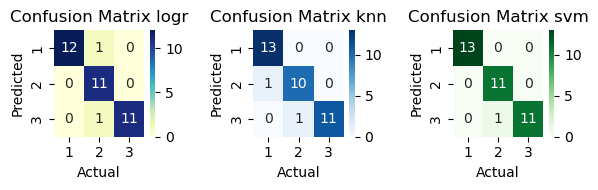

In [22]:
#plot comparision of confusion matrix with heatmap
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(6, 2))

sns.heatmap(pd.DataFrame(cnf_matrix, columns= ["1", "2", "3"], index=["1", "2", "3"]), annot=True, cmap="YlGnBu" ,fmt='g', ax=axes[0])
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_knn), columns= ["1", "2", "3"], index=["1", "2", "3"]), annot=True, cmap="Blues" ,fmt='g', ax=axes[1])
axes[1].set_xlabel("Actual")
axes[1].set_ylabel("Predicted")
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_svm), columns= ["1", "2", "3"], index=["1", "2", "3"]), annot=True, cmap="Greens" ,fmt='g', ax=axes[2])
axes[2].set_xlabel("Actual")
axes[2].set_ylabel("Predicted")

# title of each heatmap
axes[0].set_title("Confusion Matrix logr")
axes[1].set_title("Confusion Matrix knn")
axes[2].set_title("Confusion Matrix svm")

# Adjust space beetwen subplots
fig.tight_layout()


**f1 value**

In [23]:
# Import library
from sklearn.metrics import f1_score

#Add column to dataframe with f1 values
metrics["F1"] = [f1_score(y_test, y_pred_logr, average="macro") ,f1_score(y_test, y_pred_knn, average="macro"), f1_score(y_test, y_pred_svm, average="macro")]
metrics.set_index(['Model'])

,Accuracy,F1
Model,,
Logistic Regresion,0.944444,0.944396
K-Nearest Neighbors,0.944444,0.942859
Support Vector Machine,0.972222,0.971014


**Compartiva entre models de les mateixes mètriques**

Podem observar que els models de _regressió logística i knn_ tenen un pijtor resultat que _svm_ tot i que igualment és un bon resultat.  
En la matriu de confusió ja observem que els dos models tenen 2 errors mentre que _svm_ només en te 1. Com que els errors de classificació es distribueixen de diferent forma en la _regressió logística i knn_  veiem diferències en F1.

No em cansaré de repetir que perquè realment puguem aplicar aquests models, tenim massa pocs registres així com hauria de balancejar les mostres per que les representacions de cada tipus de vi fos equilibrada per tal de que el model sigues més fiable.

# Exercici 3
> Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.
---

**Logistic Regressión**

In [24]:
logr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
# import alghoritm
from sklearn.model_selection import RandomizedSearchCV

# Create a dict with most influent paramethers
params_logr =  { "C" : [1, 5, 10], "penalty" : ["l1", "l2", "elasticnet"], "solver" : ["liblinear", "sag", "lbfgs", "newton-cg", "saga"]}

# Create new variable to search best params
r_search_logr = RandomizedSearchCV(estimator=logr, param_distributions = params_logr, cv=5, n_iter=14, random_state=42 ,scoring='f1_macro') 
r_search_logr.fit(X_train, y_train)

# Show results
print("El millor resultat per f1 és ", r_search_logr.best_score_)
print("Els millors hiperparametres per a la regressió logística son : \n", r_search_logr.best_params_)

El millor resultat per f1 és  0.956977247024225
Els millors hiperparametres per a la regressió logística son : 
 {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}


**K-Nearest Neighbors**

In [26]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Text(0, 0.5, 'F1 Score')

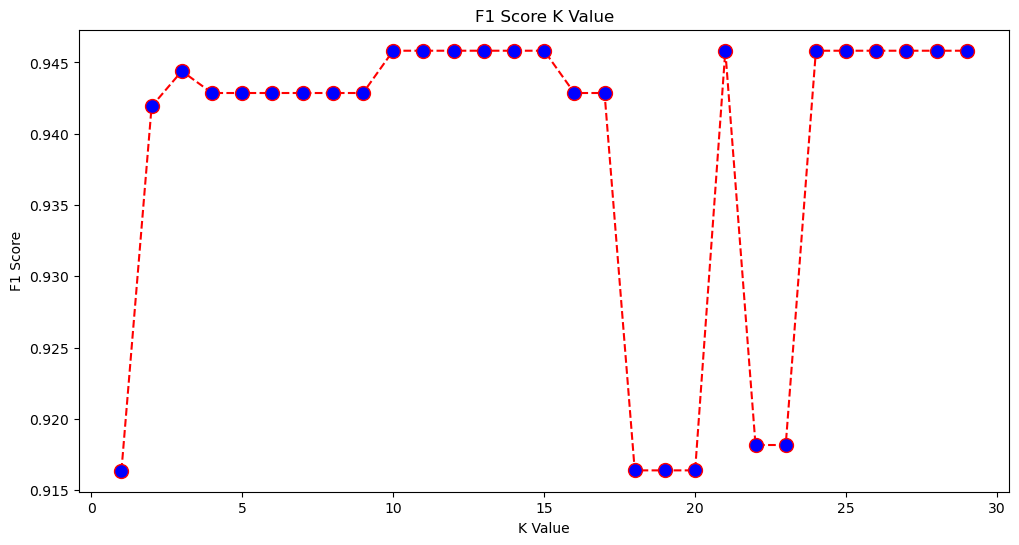

In [27]:
# Finding best number for k
# Import f1-score metric from sklearn
from sklearn.metrics import f1_score

# Creat the variable f1s and calculate f1s for k values between 1 and 40
f1s = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    ## using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='macro'))

# Plot f1s values against K-values, the only differences from regression is to choose the k value that max f1s
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

_Amb el gràfic veiem que hi ha varis valor per k en que es maximitza el valor de f1_score. Em sembla interessant poder veure aquest gràfic per veure com es comporta el model amb els diferents valors de k buscant el millor resultat de f1_score. En aquest cas ens quedariem amb k=10 a 15 o entre 24 i 30._

In [28]:
# Define knn most important paramethers for knn
params_knn = { "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], "leaf_size": [10, 30, 50], "metric": ["minkowski", "manhattan", "euclidean", "chebyshev"]}

# Create new variable to search best params
r_search_knn = RandomizedSearchCV(estimator=knn, param_distributions = params_knn, cv=5, n_iter=14, random_state=42 ,scoring='f1_macro') 
r_search_knn.fit(X_train, y_train)

# Show results
print("El millor resultat per f1 és ", r_search_knn.best_score_)
print("Els millors hiperparametres per a la regressió logística son : \n", r_search_knn.best_params_)

El millor resultat per f1 és  0.9524233593341144
Els millors hiperparametres per a la regressió logística son : 
 {'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'brute'}


**Support Vector Machine**

In [29]:
cl_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [30]:
# Define knn most important paramethers for knn
params_svm = { "C": [0.1, 1, 10, 5], "kernel": ["linear", "poly", "rbf"], "gamma": ["auto", "scale", 0.01, 0.1, 2]}

# Create new variable to search best params
r_search_svm = RandomizedSearchCV(estimator=cl_svm, param_distributions = params_svm, cv=5, n_iter=14, random_state=42 ,scoring='f1_macro') 
r_search_svm.fit(X_train, y_train)

# Show results
print("El millor resultat per f1 és ", r_search_svm.best_score_)
print("Els millors hiperparametres per a la regressió logística son : \n", r_search_svm.best_params_)

El millor resultat per f1 és  0.9723165207685331
Els millors hiperparametres per a la regressió logística son : 
 {'kernel': 'rbf', 'gamma': 'scale', 'C': 5}


In [32]:
# Create models with best paramethers
logr_best = LogisticRegression(solver = 'liblinear', penalty = 'l2', C= 10)
knn_best = KNeighborsClassifier(n_neighbors= 10, metric = 'manhattan', leaf_size = 10, algorithm = 'brute')
svm_best = svm.SVC(kernel= 'rbf', gamma = 'scale', C= 5)

# fit & predict the models
logr_best.fit(X_train, y_train)
y_pred_logr_best = logr_best.predict(X_test)

knn_best.fit(X_train, y_train)
y_pred_knn_best = knn_best.predict(X_test)

svm_best.fit(X_train, y_train)
y_pred_svm_best = svm_best.predict(X_test)

# Compare accuracy & f1 socre metric
metrics_best = pd.DataFrame({'Model': ['Logistic Regression best', 'K-Nearest Neighbors best', 'Support Vector Machine best'], 'Accuracy' : [accuracy_score(y_test, y_pred_logr_best), knn_best.score(X_test, y_test), accuracy_score(y_test, y_pred_svm_best)], 'F1' : [f1_score(y_test, y_pred_logr_best, average="micro"), f1_score(y_test, y_pred_knn_best, average="micro"), f1_score(y_test, y_pred_svm_best, average="micro")]})
metrics = metrics.append(metrics_best, ignore_index=True)
metrics = metrics.drop_duplicates() ## to avoid to duplicate values if i have to run again the input
metrics.set_index(['Model'])

,Accuracy,F1
Model,,
Logistic Regresion,0.944444,0.944396
K-Nearest Neighbors,0.944444,0.942859
Support Vector Machine,0.972222,0.971014
Logistic Regression best,0.972222,0.972222
K-Nearest Neighbors best,1.000000,1.000000
Support Vector Machine best,0.916667,0.916667


**Conclusions del rendiment dels hiperparametres**

He escollit utilitzar Randomized Search perquè en la tasca anterior havia utilitzat GridSearch i volia veure com funcionava Randomized Search. Soc conscient, que per un exercici com aquest, en que estem utilitzant un dataset petit i pocs hiperparametres seria millor utilitzar **GridSearch** ya que el temps estimat per trobar aquest hiperparametres no hauria de ser molt extens.

Randomized Search és recomanble utilitzar-lo si valores tenir un mínim d'eficiència amb menys temps. Per tant, s'acostuma utilitzar en dataset grans o quan es vol probar múltiples combinacions d'hiperparametres, ja que només escull un número determinat de combinacions a difeerència de GridSearch que estudia totes les combinacions possibles.

Dit això veiem que tant _logistic regression i knn_ milloren els resultats sustancialment. Inclús knn ens surt un encaix perfecte ja que els resultats de les mètriques son igual a 1. 
Per altra banda, veiem que_svm_ empitjoa sustancialment els resultats, tenint en compte que es segueix mantenint per sobre del 0.9 el cual és un gran indicador. 

S'ha de tenir en compte que estem treballant amb un dataset petit i que els resultats inicials de l'avaulació dels models ja era molt bona, per tant millorar-la era dificil.

**Una cosa que no acabo d'entendre és perquè no em cuadra el resultat de f1 quan he buscat els hiperparametres amb els que he afegit a la taula**. En el cas de knn si perquè el valor de k-neighbors ja he vist que és diferent però la restà no acabo d'entendre-ho. 

# Exercici 4
> Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.
---

**CrossValidation**

In [33]:
# import CV method
from sklearn.model_selection import cross_val_score

# Declare again the models to avoid overfitting
logr = LogisticRegression()
logr_best = LogisticRegression(solver = 'liblinear', penalty = 'l2', C= 10)
knn = KNeighborsClassifier()
knn_best = KNeighborsClassifier(n_neighbors= 10, metric = 'manhattan', leaf_size = 10, algorithm = 'brute')
cl_svm = svm.SVC(kernel='linear')
svm_best = svm.SVC(kernel= 'rbf', gamma = 'scale', C= 5)

# Calculate CV
print("CV for \033[1mLogistic Regression\033[0m \n", cross_val_score(logr, X, y, cv=5, scoring='f1_macro'), "\n", "F1 mean: {:.2f}, std: {:.2f}".format(cross_val_score(logr, X, y, cv=5, scoring='f1_macro').mean(), cross_val_score(logr, X, y, cv=5, scoring='f1_macro').std()))
print("CV for \033[1mLogistic Regression best\033[0m \n", cross_val_score(logr_best, X, y, cv=5, scoring='f1_macro'), "\n", "F1 mean: {:.2f}, std: {:.2f}".format(cross_val_score(logr_best, X, y, cv=5, scoring='f1_macro').mean(), cross_val_score(logr_best, X, y, cv=5, scoring='f1_macro').std()))
print("CV for \033[1mK-Nearest Neighbors\033[0m \n", cross_val_score(knn, X, y, cv=5, scoring='f1_macro'), "\n", "F1 mean: {:.2f}, std: {:.2f}".format(cross_val_score(knn, X, y, cv=5, scoring='f1_macro').mean(), cross_val_score(knn, X, y, cv=5, scoring='f1_macro').std()))
print("CV for \033[1mK-Nearest Neighbors best\033[0m \n", cross_val_score(knn_best, X, y, cv=5, scoring='f1_macro'), "\n", "F1 mean: {:.2f}, std: {:.2f}".format(cross_val_score(knn_best, X, y, cv=5, scoring='f1_macro').mean(), cross_val_score(knn_best, X, y, cv=5, scoring='f1_macro').std()))
print("CV for \033[1mSupport Vector Machine\033[0m \n", cross_val_score(cl_svm, X, y, cv=5, scoring='f1_macro'), "\n", "F1 mean: {:.2f}, std: {:.2f}".format(cross_val_score(cl_svm, X, y, cv=5, scoring='f1_macro').mean(), cross_val_score(cl_svm, X, y, cv=5, scoring='f1_macro').std()))
print("CV for \033[1mSupport Vector Machine best\033[0m \n", cross_val_score(svm_best, X, y, cv=5, scoring='f1_macro'), "\n", "F1 mean: {:.2f}, std: {:.2f}".format(cross_val_score(svm_best, X, y, cv=5, scoring='f1_macro').mean(), cross_val_score(svm_best, X, y, cv=5, scoring='f1_macro').std()))



CV for Logistic Regression 
 [0.9162963  1.         0.94747475 0.92203898 0.94285714] 
 F1 mean: 0.95, std: 0.03
CV for Logistic Regression best 
 [0.97178131 1.         0.97401299 0.97432099 0.97096189] 
 F1 mean: 0.98, std: 0.01
CV for K-Nearest Neighbors 
 [0.86406186 0.88850039 0.8974359  0.88225108 0.88760684] 
 F1 mean: 0.88, std: 0.01
CV for K-Nearest Neighbors best 
 [0.89413705 0.94871795 0.97432099 0.92296296 0.94415386] 
 F1 mean: 0.94, std: 0.03
CV for Support Vector Machine 
 [0.91351241 1.         0.94318411 0.97432099 0.94415386] 
 F1 mean: 0.96, std: 0.03
CV for Support Vector Machine best 
 [0.91514687 1.         0.91989505 0.9484127  0.94415386] 
 F1 mean: 0.95, std: 0.03


In [34]:
# Add results from CV to metrics table
metrics["CV_F1_mean"] = [cross_val_score(logr, X, y, cv=5, scoring='f1_macro').mean(), cross_val_score(knn, X, y, cv=5, scoring='f1_macro').mean(), cross_val_score(cl_svm, X, y, cv=5, scoring='f1_macro').mean(), cross_val_score(logr_best, X, y, cv=5, scoring='f1_macro').mean(), cross_val_score(knn_best, X, y, cv=5, scoring='f1_macro').mean(), cross_val_score(svm_best, X, y, cv=5, scoring='f1_macro').mean()]
metrics["CV_std"] = [cross_val_score(logr, X, y, cv=5, scoring='f1_macro').std(), cross_val_score(knn, X, y, cv=5, scoring='f1_macro').std(), cross_val_score(cl_svm, X, y, cv=5, scoring='f1_macro').std(), cross_val_score(logr_best, X, y, cv=5, scoring='f1_macro').std(), cross_val_score(knn_best, X, y, cv=5, scoring='f1_macro').std(), cross_val_score(svm_best, X, y, cv=5, scoring='f1_macro').std()]
metrics.set_index(["Model"])

,Accuracy,F1,CV_F1_mean,CV_std
Model,,,,
Logistic Regresion,0.944444,0.944396,0.945733,0.029611
K-Nearest Neighbors,0.944444,0.942859,0.883971,0.011085
Support Vector Machine,0.972222,0.971014,0.955034,0.029586
Logistic Regression best,0.972222,0.972222,0.978215,0.010967
K-Nearest Neighbors best,1.000000,1.000000,0.936859,0.026891
Support Vector Machine best,0.916667,0.916667,0.945522,0.030191


**Que ens diu la CrossValidation**  

La Cross Validation el que fa es comprovar el resultat del model dividint el subset de prova en varis conjunts més petits (folds) y realitza l'avaulació d'aquest segons la mètrica que hem marcat. El número de conjunts dependrà del valor que li donem al parametre cv, el qual serà el número de cops que s'entrena el model, tenint en compte que en la seva iteració, un d'aquests plecs s'utilitza com a prova. 
Segons la mètrica que li donem el parametre scoring ens mostrara el resultat de cada pleg segons aquesta mètrica. Finalment calcularem la mitjà de tots els resultats que li hem demanat. 
En el nostre cas li hem demanat que ens calcules el valor **F1** i posteriorment la mitja d'aquest per comparar-ho amb el model original. 

Per altra banda, calcula la desviació estandard de la puntuació de F1 ens indica com és la dispersió de les dades. En principi, com que aquesta és baixa, hauria d'estar generalitzant bé. 

En general ens confirma que el comportament dels models és molt correcte.
  + **Logistic regression**: Veiem que la CV practicament calca el resultat en F1 i std te un valor baix per tant podem dir que es confirma la bona actuació del model. En la millora dels parametres veiem que el valor de f1 el converteix en el millor model i pel que fa a std també.
  + **knn**: Veiem que la CV de f1 és bastant inferior, això vol dir que el model esta donant millors resultats segons la mostra que s'ha escollit aleatoriament al realizat el model. Tot i així un 0.88 segueix indicant un bon rendiment. A més a més la std baixa mostra que no hi ha molta desviació. Pel que fa amb la millora de parametres, la CV si que mostra un empitjorament del rendiment del model cosa que ens indica que ha estat sort que el resultat sigui perfecte i així descartem que es tracte d'un overfitting. 
  + **SVM**: veiem que el resultat de CV equilibra els resultats, ja que abans d'utilitzar els hiperparametres era molt i després era més baix i la CV que es manté entre 0.94 i 0.95 ens indica un valor més real del funcionament del model. Podriem assegurar però que el model funciona millor amb els parametres per defecte que els proposats amb RandomizedSearch.
  
Veient la CV_F1_mean i tenint en compte el valor de CV_std, **em quedaria amb el model de regressió logística best** ja que al cv fa més avaluacions i em sembla que dona un resultat més real de com funcionara el dataset amb la data no vista. 

# Exercici 5
> Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)
---

Anteriorment, a l'apartat de preprocessat,  ja hem aplicat diferents processos d'enginyeria per tal  de millorar els resultats escalant les variables features. Concretament hem seguit els següents passos:
1. Fer un test d'hipostesi per veure quin tipus de distribució tenen les variables
2. A través de graficar les variables amb histogrames i boxplot hem pogut comprovar quina forma tenen les variables i si aquestes tenien outliers. Depenen dels resultats, els procés d'enginyeria més recomenat canvia:
  +  Variables númeriques amb **distribució Gaussiana**: -> **StandarScaler**
  +  Variables númeriques **sense distribució Gaussiana**:
      + Amb Outliers -> RobustScaler
      + NO Outliers -> ScalerNorm

De totes maneres podem veure que passa si fem un balancejat dels registres perquè tinguem les mateixes observacions per cada un dels tipus de vi, així l'estudi de classificació és equilibrat per tal de reconeixer per igual tots els tipus. 

In [35]:
# Import alghoritm to balance the samples. 
from imblearn.over_sampling import RandomOverSampler

# balance the dataset
wines_resampled = RandomOverSampler()
X_resampled, y_resampled = wines_resampled.fit_resample(X_train, y_train)

<AxesSubplot:>

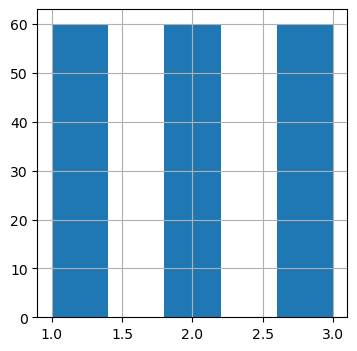

In [36]:
# plot the result to confirm that balanced has been done correctly
y_resampled.hist(bins=5, figsize= (4, 4))

_veiem que efectivament s'ha realitzat el balanceig. Ara el que podem fer és repetir el procediment amb els 3 models per veure quins resultats obtenim_

In [37]:
# Search best paramethers for each balanced model
r_search_logr.fit(X_resampled, y_resampled)
r_search_knn.fit(X_resampled, y_resampled)
r_search_svm.fit(X_resampled, y_resampled)

print("\033[1mLogistic Regression balanced\033[0m \n","El millor resultat per f1 és", r_search_logr.best_score_)
print(" Els millors hiperparametres son : ", r_search_logr.best_params_)
print("\033[1mK-Nearest Neighbors balanced\033[0m \n","El millor resultat per f1 és", r_search_knn.best_score_)
print(" Els millors hiperparametres son : ", r_search_knn.best_params_)
print("\033[1mSupport Vector Machine balanced\033[0m \n","El millor resultat per f1 és", r_search_svm.best_score_)
print(" Els millors hiperparametres son : ", r_search_svm.best_params_)

Logistic Regression balanced 
 El millor resultat per f1 és 0.9665503192459713
 Els millors hiperparametres son :  {'solver': 'saga', 'penalty': 'l1', 'C': 5}
K-Nearest Neighbors balanced 
 El millor resultat per f1 és 0.9487046287046287
 Els millors hiperparametres son :  {'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'brute'}
Support Vector Machine balanced 
 El millor resultat per f1 és 0.9776807540285801
 Els millors hiperparametres son :  {'kernel': 'linear', 'gamma': 0.01, 'C': 10}


In [38]:
# Recall models best_parameters with ds balanced
logr_best_bal = LogisticRegression(solver = 'saga', penalty = 'l1', C= 5)
logr_best_bal.fit(X_resampled, y_resampled)
y_pred_logr_best_bal = logr_best_bal.predict(X_test)

knn_best_bal = KNeighborsClassifier(n_neighbors= 10, metric = 'manhattan', leaf_size = 10, algorithm = 'brute')
knn_best_bal.fit(X_resampled, y_resampled)
y_pred_knn_best_bal = knn_best_bal.predict(X_test)


svm_best_bal = svm.SVC(kernel= 'linear', gamma = 0.01, C= 10)
svm_best_bal.fit(X_resampled, y_resampled)
y_pred_svm_best_bal = svm_best_bal.predict(X_test)

In [39]:
# Compare accuracy & f1 socre metric
metrics_best = pd.DataFrame({'Model': ['Logistic Regression bal', 'K-Nearest Neighbors bal', 'Support Vector Machine bal'], 'Accuracy' : [accuracy_score(y_test, y_pred_logr_best_bal), knn_best_bal.score(X_test, y_test), accuracy_score(y_test, y_pred_svm_best_bal)], 'F1' : [f1_score(y_test, y_pred_logr_best_bal, average="macro"), f1_score(y_test, y_pred_knn_best_bal, average="macro"), f1_score(y_test, y_pred_svm_best_bal, average="macro")], 'CV_F1_mean' : [cross_val_score(logr_best_bal, X, y, cv=5, scoring='f1_macro').mean(), cross_val_score(knn_best_bal, X, y, cv=5, scoring='f1_macro').mean(), cross_val_score(svm_best_bal, X, y, cv=5, scoring='f1_macro').mean()], 'CV_std' : [cross_val_score(logr_best_bal, X, y, cv=5, scoring='f1_macro').std(), cross_val_score(knn_best_bal, X, y, cv=5, scoring='f1_macro').std(), cross_val_score(svm_best_bal, X, y, cv=5, scoring='f1_macro').std()] }) 
metrics = metrics.append(metrics_best, ignore_index=True)
metrics = metrics.drop_duplicates() ## to avoid to duplicate values if i have to run again the input
metrics.set_index(['Model'])

,Accuracy,F1,CV_F1_mean,CV_std
Model,,,,
Logistic Regresion,0.944444,0.944396,0.945733,0.029611
K-Nearest Neighbors,0.944444,0.942859,0.883971,0.011085
Support Vector Machine,0.972222,0.971014,0.955034,0.029586
Logistic Regression best,0.972222,0.972222,0.978215,0.010967
K-Nearest Neighbors best,1.000000,1.000000,0.936859,0.026891
Support Vector Machine best,0.916667,0.916667,0.945522,0.030191
Logistic Regression bal,0.972222,0.972174,0.977730,0.021247
K-Nearest Neighbors bal,0.972222,0.971781,0.936859,0.026891
Support Vector Machine bal,0.972222,0.972174,0.959724,0.029271


**Conclusions**

Personalment crec que és millor balancejar les mostres de forma equitativa quan es tracta un problema de classificació, si és possible, perquè crec que així s'entrena millor el model encara que potser ens dona un resultat momentani pitjor.

Veiem que el resultat balancejat abans d'aplicar la CV equilibra tots els models en valors de les mètriques molt similars. Amb la CV si que veiem un millor rendiment de _logsitic regression_ però inferior al resultat del mateix model amb els millors parametres abans de balancejar-lo.
Jo sempre soc partidari de balancejar les mostres, però tenint en compte que la mostra escollida ja estava bastant equilibrada és indiferent en aquest cas quina forma utilitzem, pero tenim clar que ens quedem amb el model de _regressió logistica_